In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

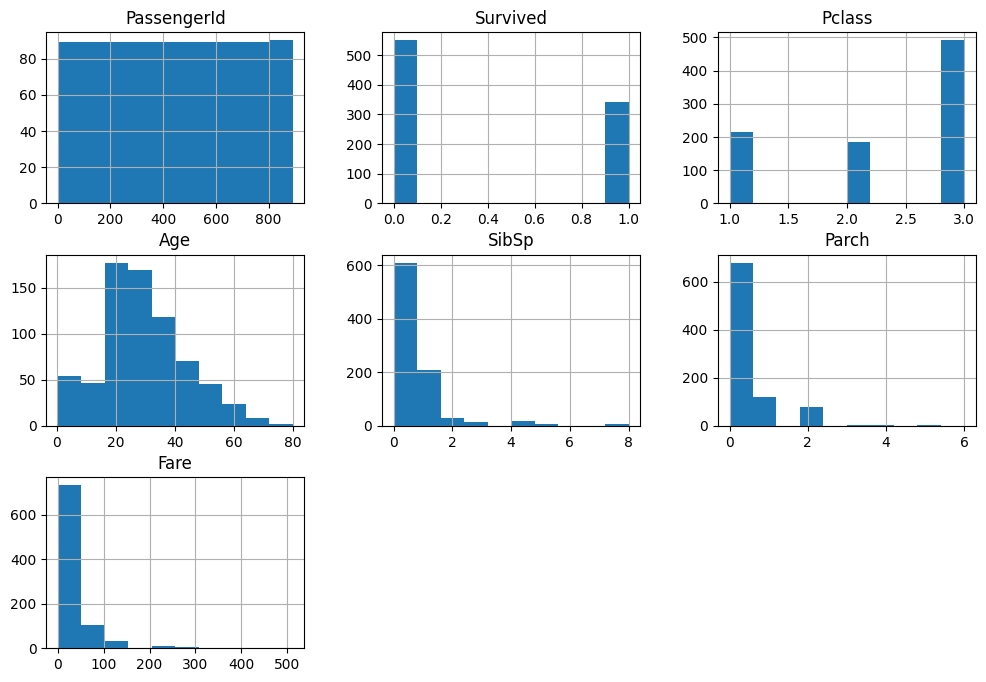

In [49]:
train.select_dtypes(include=['float64', 'int64']).hist(figsize=(12,8))
plt.show()

In [50]:
train = train.drop(["PassengerId", "Name", "Cabin"], axis=1)
test_ids = test["PassengerId"]  # save for submission
test = test.drop(["PassengerId", "Name", "Cabin"], axis=1)

In [51]:
# Separate numeric and categorical columns
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train.select_dtypes(include=['object']).columns

# Fill numeric columns
for col in numeric_cols:
    if col == "Transported":  # skip target
        continue
    train[col] = train[col].fillna(train[col].mean())
    if col in test.columns:  # only if column exists in test
        test[col] = test[col].fillna(train[col].mean())

# Fill categorical columns
for col in categorical_cols:
    train[col] = train[col].fillna(train[col].mode()[0])
    if col in test.columns:
        test[col] = test[col].fillna(train[col].mode()[0])

In [52]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.000000,1,0,113803,53.1000,S
4,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S
887,1,1,female,19.000000,0,0,112053,30.0000,S
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.000000,0,0,111369,30.0000,C


In [53]:
X = train.drop("Survived", axis=1)
y = train["Survived"].astype(int)

# Combine train and test for encoding
combined = pd.concat([X, test])
combined = pd.get_dummies(combined)

# Split back
X = combined.iloc[:len(X), :]
test = combined.iloc[len(X):, :]

In [54]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_valid)
print("Validation Accuracy:", accuracy_score(y_valid, y_pred))

Validation Accuracy: 0.8156424581005587


In [55]:
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred))

Confusion Matrix:
 [[96  9]
 [24 50]]


In [56]:
print("Classification Report:\n", classification_report(y_valid, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       105
           1       0.85      0.68      0.75        74

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



In [59]:
# Make sure test_ids is saved BEFORE any encoding
test_ids = pd.read_csv("test.csv")["PassengerId"]

# Predictions (already done)
test_predictions = clf.predict(test)

# Create submission with 0/1
submission = pd.DataFrame({
    "PassengerId": test_ids,
    "Transported": test_predictions.astype(int)
})

# Save correctly
submission.to_csv("submission_lab2.csv", index=False)

print(submission.head())
print(submission.dtypes)

   PassengerId  Transported
0          892            0
1          893            0
2          894            0
3          895            0
4          896            1
PassengerId    int64
Transported    int64
dtype: object
